In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customerchurn/Churn_Modelling.csv


This is a Binary Classification Problem

In [2]:
df = pd.read_csv('/kaggle/input/customerchurn/Churn_Modelling.csv')

In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)

(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Therefore we cannot see any missing data in the above code

In [6]:
df.duplicated().sum()

0

No duplicated row

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


2024-02-03 21:52:07.760264: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 21:52:07.760345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 21:52:07.762005: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
#Model Building
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 3)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 172 (688.00 Byte)
Trainable params: 172 (688.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8667 - val_loss: 0.3510 - val_accuracy: 0.8481
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8670 - val_loss: 0.3505 - val_accuracy: 0.8487
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.8666 - val_loss: 0.3517 - val_accuracy: 0.8500
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8683 - val_loss: 0.3500 - val_accuracy: 0.8512
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8652 - val_loss: 0.3521 - val_accuracy: 0.8512
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8675 - val_loss: 0.3513 - val_accuracy: 0.8500
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8669 - val_loss: 0.3507 - val_accuracy: 0.8512

In [30]:
model.layers[0].get_weights()

[array([[-0.0345818 ,  0.3888539 ,  0.3239909 ,  0.40127537,  0.23359668,
          0.12820211, -0.1322048 ,  0.1305328 ,  0.3311168 , -0.08772776,
          0.49907425],
        [-1.3118519 , -0.45094058,  0.5000899 , -0.15563025, -0.5269586 ,
          0.6768247 ,  0.01282356, -1.127367  , -1.0580744 , -1.1770915 ,
         -0.6178871 ],
        [-0.15840687,  0.33797896, -0.16384593,  0.06394853, -0.1279826 ,
          0.51743615, -0.16063032,  0.21787678, -0.4129054 ,  0.25376472,
         -0.0035156 ],
        [-0.6539975 , -0.568956  ,  0.09726878,  0.632913  ,  0.01304192,
         -0.28432804, -0.14024442,  0.17407946,  0.12867206,  0.01072432,
         -0.27752456],
        [-0.37827784, -1.6547353 , -0.14198816,  1.567222  , -1.8191755 ,
         -0.1921169 , -1.423166  , -0.35716507, -0.18956132, -0.48119482,
         -0.23643039],
        [-0.5789687 ,  0.01266138,  0.3133532 ,  0.21057454, -0.06585946,
          0.4533363 ,  0.1498525 ,  0.40370917,  0.00964792, -0.6577129

In [31]:
model.layers[1].get_weights()

[array([[-0.18492666, -1.6858555 , -0.03416184],
        [-1.0299071 ,  0.2457592 , -1.4075116 ],
        [ 0.87087345, -0.32748154,  0.13462771],
        [-1.5865841 ,  0.6905328 , -0.93527746],
        [-0.9956985 ,  1.1980965 , -0.87306136],
        [ 0.22813751, -0.43182653,  0.56833464],
        [-0.8921328 ,  0.3998117 , -0.44894028],
        [ 1.6546153 , -0.54462135,  0.42933205],
        [ 1.0968282 , -0.8931727 , -0.09661683],
        [ 0.76693505, -0.48673108,  0.18509506],
        [ 0.00423229, -0.0856166 ,  1.7327255 ]], dtype=float32),
 array([ 0.34911367,  0.17074   , -0.01347981], dtype=float32)]

In [32]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [33]:
y_pred = np.where(y_log>0.5,1,0)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8625

In [35]:
import matplotlib.pyplot as plt


In [36]:
history.history

{'loss': [0.3298540413379669,
  0.3299371004104614,
  0.3299517333507538,
  0.32992488145828247,
  0.3298143148422241,
  0.32960137724876404,
  0.32933178544044495,
  0.3294331729412079,
  0.32947447896003723,
  0.32930633425712585,
  0.3294340968132019,
  0.32925766706466675,
  0.3290000259876251,
  0.3291226625442505,
  0.3290996849536896,
  0.3291231393814087,
  0.3291201889514923,
  0.32875946164131165,
  0.3289438486099243,
  0.3287845551967621,
  0.32849347591400146,
  0.3288350999355316,
  0.32861101627349854,
  0.32842957973480225,
  0.32832688093185425,
  0.3284021019935608,
  0.3284819722175598,
  0.32817763090133667,
  0.3280898332595825,
  0.3281747102737427,
  0.3280225098133087,
  0.3281904458999634,
  0.3282928466796875,
  0.32788559794425964,
  0.3279138505458832,
  0.3277232050895691,
  0.32750362157821655,
  0.3273939788341522,
  0.32776230573654175,
  0.3275902271270752,
  0.3275262415409088,
  0.3275277018547058,
  0.3274003565311432,
  0.3279133141040802,
  0.32713

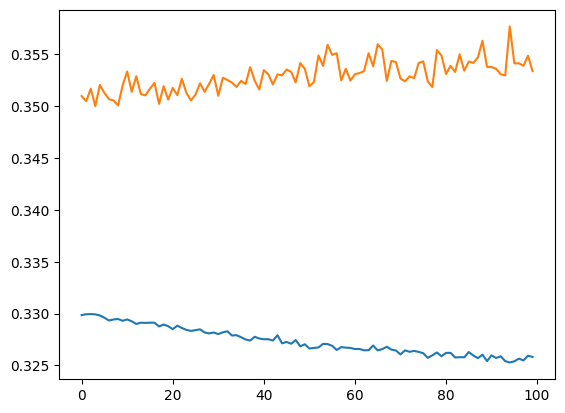

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

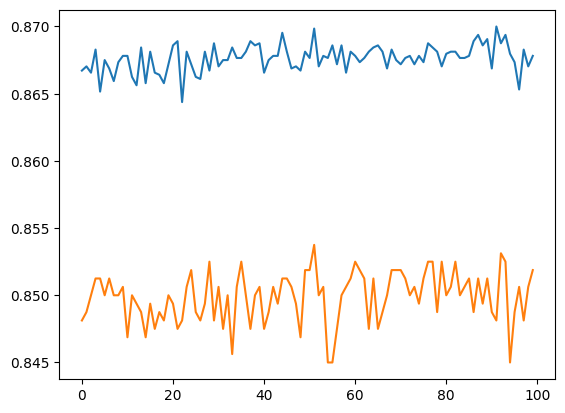

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])